In [1]:
import numpy as np 
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import leidenalg
import scipy
import squidpy as sqcd 
import anndata as ad


In [2]:
adata = sc.read_h5ad("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Gokul_Srinivasan/Colon_ST_Training/gene_selection/all_genes_filtered_raw/data/adatas/106_A4-60_B3_0_adata.h5ad")

In [3]:
adata.var_names_make_unique()
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # This assumes gene names start with 'MT-' for mitochondrial genes

In [4]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [5]:
adata

AnnData object with n_obs × n_vars = 6492 × 17796
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

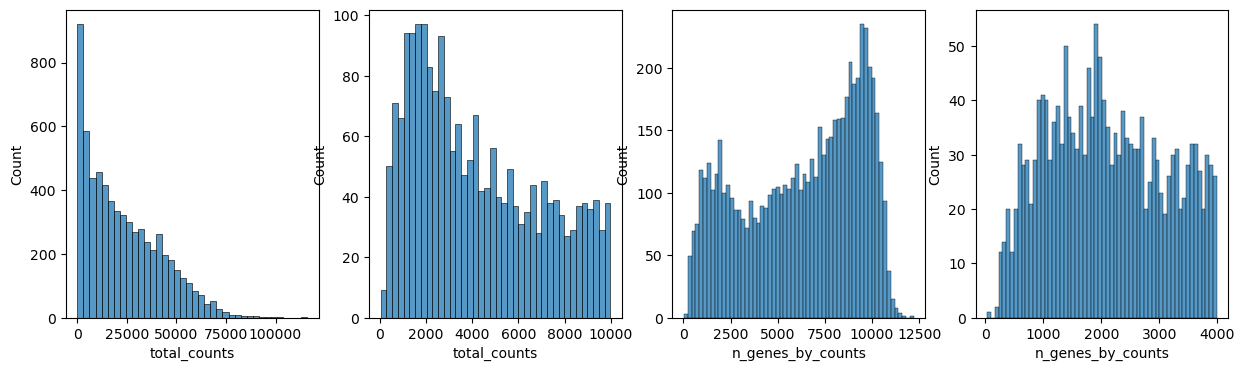

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [7]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 3464


In [8]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [9]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


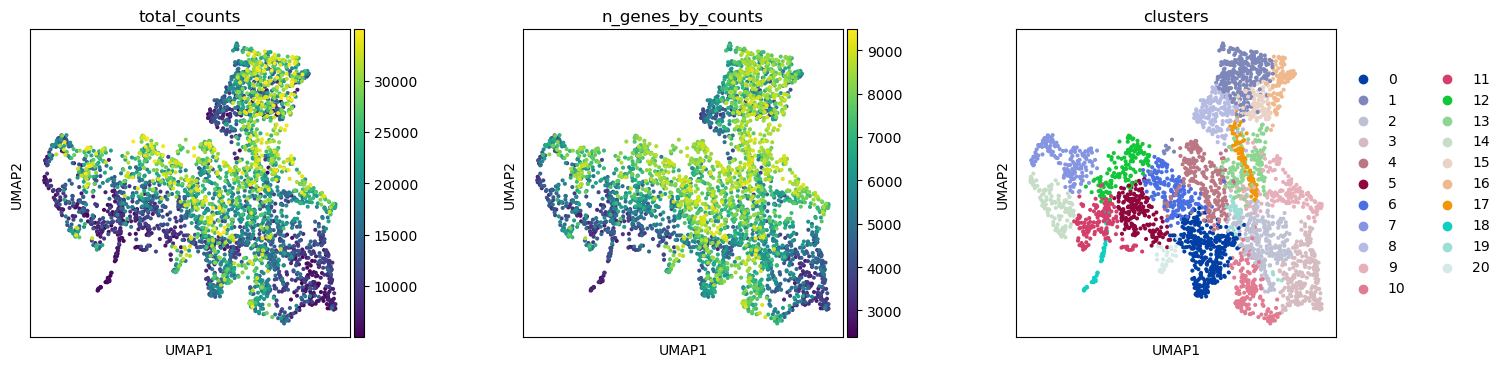

In [10]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [11]:
adata.uns

{'spatial': {'106_A4-60_B3': {'images': {'hires': array([[[0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            ...,
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216]],
    
           [[0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            ...,
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216]],
    
           [[0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            ...,
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98039216],
            [0.98039216, 0.98039216, 0.98

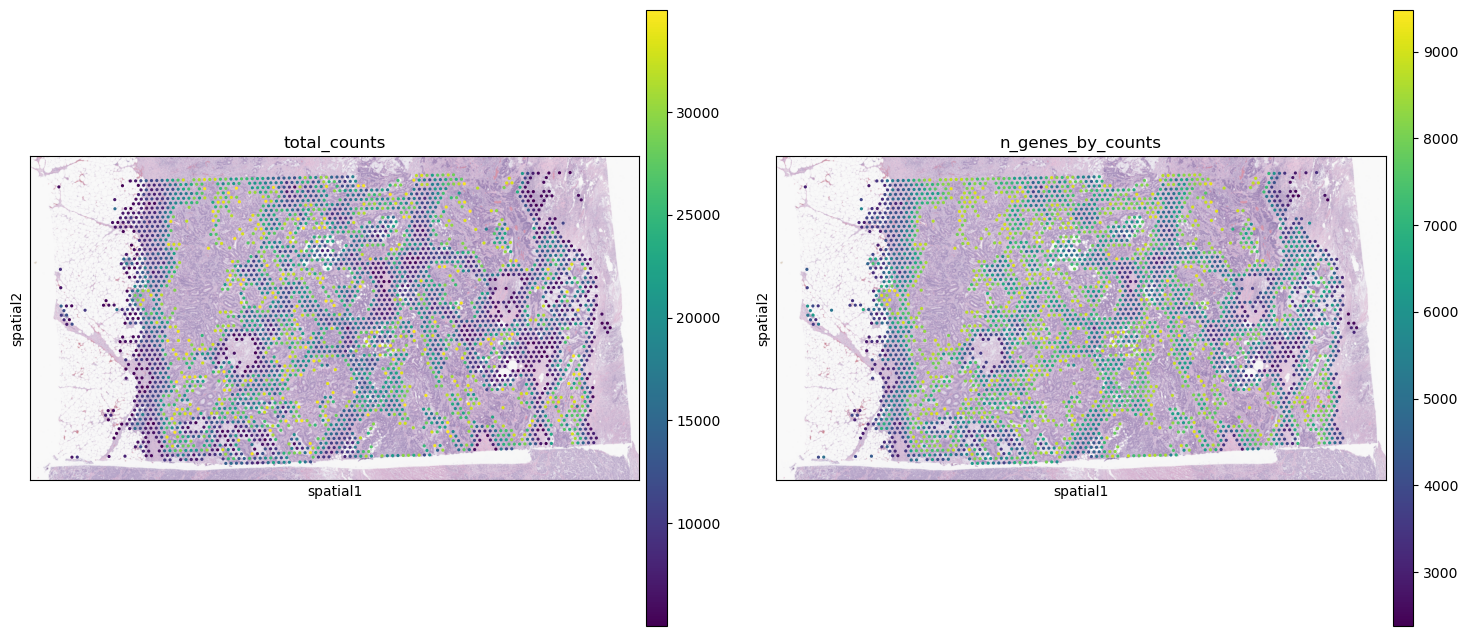

In [12]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])


In [13]:
if 'spatial' in adata.uns:
    print("Spatial data is present.")
else:
    print("Spatial data is missing.")

Spatial data is present.


In [14]:
if 'spatial' in adata.uns:
    library_ids = list(adata.uns['spatial'].keys())
    for library_id in library_ids:
        print(f"Library ID: {library_id}")
        print("Available image keys:", list(adata.uns['spatial'][library_id]['images'].keys()))


Library ID: 106_A4-60_B3
Available image keys: ['hires', 'lowres']


/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


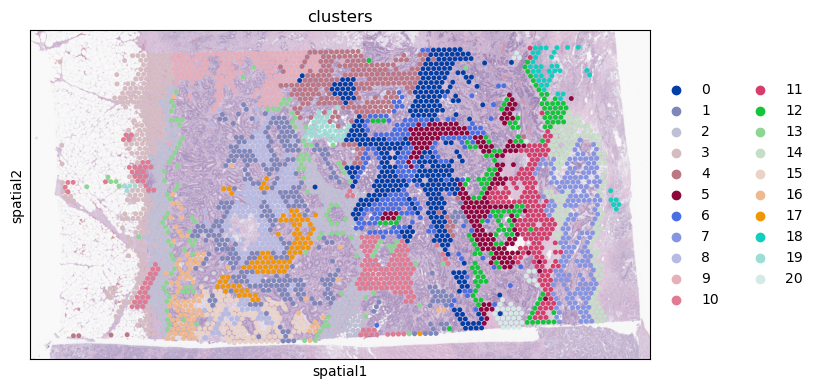

In [16]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


categories: 0, 1, 2, etc.
var_group_labels: 3


/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_S

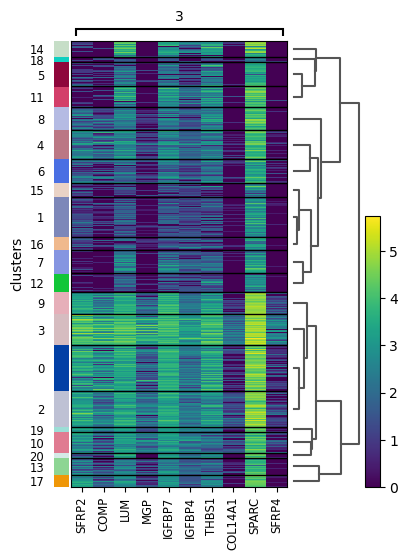

In [17]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="3", n_genes=10, groupby="clusters")

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/alos/jp_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


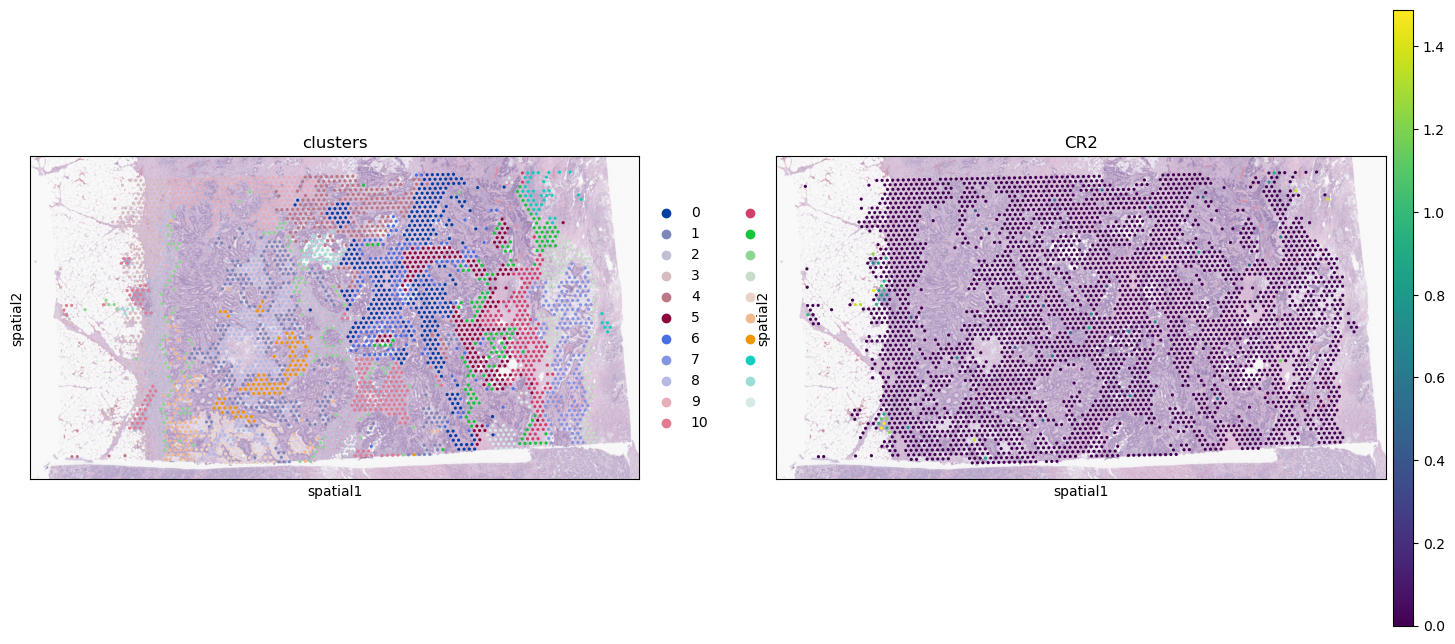

In [18]:
sc.pl.spatial(adata, img_key="hires", color=["clusters", "CR2"])



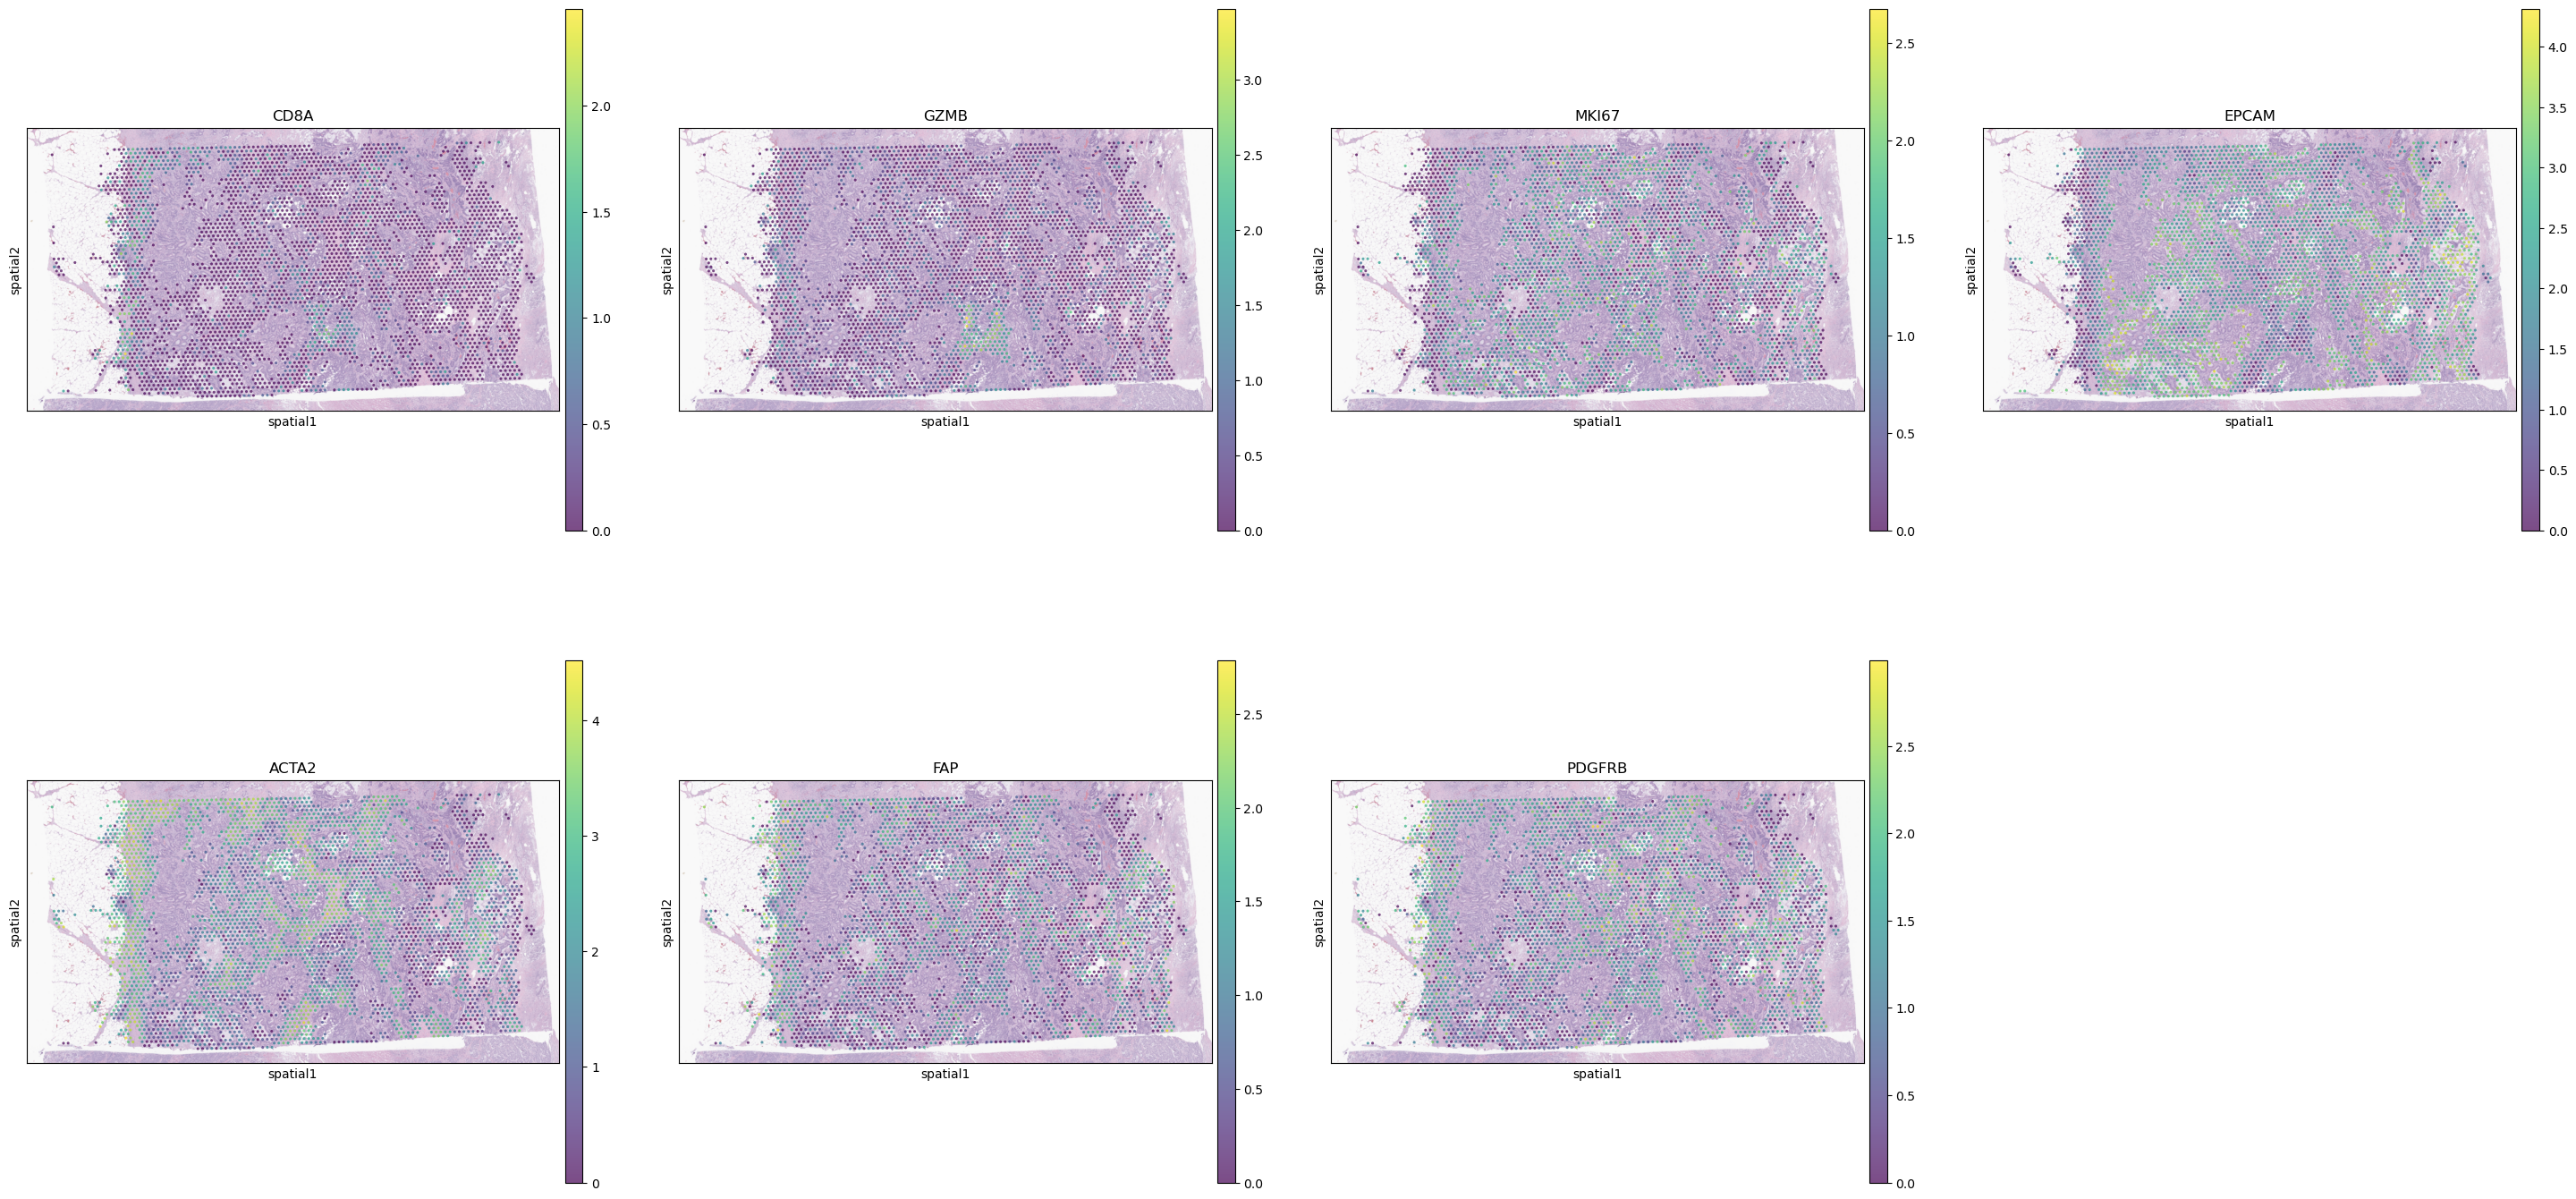

In [21]:
# Example: Checking for the presence of CD8A and CD8B
#cd8_markers = ["CD8A", "CD8B", "GZMB"]
#tumor_markers = ["MKI67", "EPCAM"]
#caf_markers = ["ACTA2", "FAP", "PDGFRB"]

sc.pl.spatial(adata, img_key="hires", color=["CD8A", "GZMB","MKI67", "EPCAM","ACTA2", "FAP", "PDGFRB"], alpha=0.7)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define markers
cd8_markers = ["GZMB"]
tumor_markers = ["MKI67", "EPCAM"]
caf_markers = ["ACTA2", "FAP", "PDGFRB"]

# Initialize a DataFrame to store the maximum expression value for each category per cell
cells_marker_expression = pd.DataFrame(index=adata.obs.index, columns=['CD8+', 'Tumor', 'CAF'])

# Fill the DataFrame with the maximum expression values for each marker set
for gene in cd8_markers:
    cells_marker_expression['CD8+'] = np.maximum(cells_marker_expression['CD8+'].fillna(0), adata[:, gene].X.toarray().ravel())

for gene in tumor_markers:
    cells_marker_expression['Tumor'] = np.maximum(cells_marker_expression['Tumor'].fillna(0), adata[:, gene].X.toarray().ravel())

for gene in caf_markers:
    cells_marker_expression['CAF'] = np.maximum(cells_marker_expression['CAF'].fillna(0), adata[:, gene].X.toarray().ravel())

# Determine the category with the highest expression for each cell
cells_marker_expression['MaxCategory'] = cells_marker_expression.idxmax(axis=1)

# Plot
plt.figure(figsize=(10, 8))

for category, color in colors.items():
    # Determine which cells belong to this category
    category_mask = cells_marker_expression['MaxCategory'] == category
    # Convert the mask to a boolean array that can be used for indexing
    category_indices = category_mask[category_mask].index
    # Convert category indices to boolean array valid for spatial indexing
    valid_indices = adata.obs_names.isin(category_indices)
    
    if np.any(valid_indices):
        plt.scatter(
            adata.obsm['spatial'][valid_indices, 0],
            adata.obsm['spatial'][valid_indices, 1],
            label=category, color=color, alpha=0.6
        )

plt.colorbar(label='Expression level')
plt.xlabel('Spatial coordinate X')
plt.ylabel('Spatial coordinate Y')
plt.title('Spatial distribution of cell-type markers')
plt.legend()
plt.show()
